# Midterm 2

# Time Limit - 2.30 pm to 6.30 pm

# 20 + 20 - 40 Marks

### Instructions

- The exam must be submitted on D2L by 6.30pm. No exceptions here. Only a single .ipynb file

- Most Important - Your submitted code should not match a code from the internet. If it does, it is a straight 0.

- The grades for Midterm1 and Midterm2, both will be considered and i will average out the grades.

- You must submit individually You will be liable for penalties if your work matches exactly the other person in your class or from the internet. So be careful.

## Problem 1
### The relevant Dataset (CIFAR 100) have been described below.




This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 100 fine-grained classes that are grouped into 20 coarse-grained classes.

- Images have low resolution (32x32). 

- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

Read the website thoroughly.

The dataset can be directly fetched from Keras.io Website for easy incorporation into your code.
https://keras.io/api/datasets/cifar100/

### CIFAR-100 Image label detection of provided images

### Choose PCA+Random Forest+XGBoost And apply the techniques to the CIFAR-100 Dataset to Classify the Images.

### Apply PCA for reducing Dimensions. [5 Marks]
### Apply Random Forest with AdaBoost for model creation. [5 Marks].
### Recall or Precision Value? Which one should be optimised?? Show your optimised confusion matrix. [5 Marks]

### Download the 4 images provided on D2L. These images are of television,camel,wardrobe, and truck. Create a validation dataset using these images and predict the labels using the model of CIFAR-100 created by you as above. [5 Marks]

In [1]:
# import dataset from keras
import tensorflow as tf
from tensorflow import keras

df = tf.keras.datasets.cifar100.load_data(label_mode="fine") # import dataset

169017344/169001437 [==============================] - 13s 0us/step


In [2]:
# import libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore") # turn off warning

In [3]:
# import scaler libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
df # check datase

((array([[[[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ...,
           [195, 205, 193],
           [212, 224, 204],
           [182, 194, 167]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [254, 254, 254],
           ...,
           [170, 176, 150],
           [161, 168, 130],
           [146, 154, 113]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [255, 255, 255],
           ...,
           [189, 199, 169],
           [166, 178, 130],
           [121, 133,  87]],
  
          ...,
  
          [[148, 185,  79],
           [142, 182,  57],
           [140, 179,  60],
           ...,
           [ 30,  17,   1],
           [ 65,  62,  15],
           [ 76,  77,  20]],
  
          [[122, 157,  66],
           [120, 155,  58],
           [126, 160,  71],
           ...,
           [ 22,  16,   3],
           [ 97, 112,  56],
           [141, 161,  87]],
  
          [[ 87, 122,  41],
           [ 8

In [5]:
# assign metadata labels
labels= ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'] 
pd.DataFrame(labels, columns=['Fine-Labels']) # print

,Fine-Labels
0,apple
1,aquarium_fish
2,baby
3,bear
4,beaver
...,...
95,whale
96,willow_tree
97,wolf
98,woman


In [6]:
# split dataset into training and testing
(x_train, y_train), (x_test, y_test) = df
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

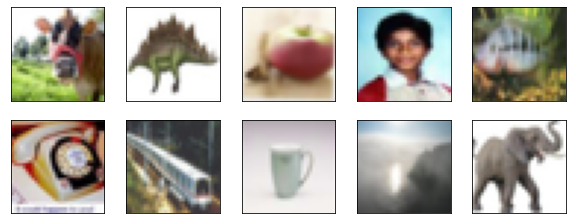

In [7]:
# Show 10  images
plt.figure(figsize=(10,10)) # set size for the image
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    
plt.show()

# The CIFAR labels are in arrays, extra index is needed

In [8]:
# to improve computational efficiency
#x_train = x_train / 255.0
# x_test = x_test / 255.0

In [9]:
y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [10]:
y_train[0].astype(int)[0] # get label number for y_train

19

In [11]:
type(x_train)

numpy.ndarray

In [12]:
x_train.shape # check the shape

(50000, 32, 32, 3)

In [13]:
y_train.shape # check the shape

(50000, 1)

In [14]:
# combine the 2nd to 4th dimension to create 2d data for analysis
x_train = x_train.reshape(50000, 32*32*3)
x_test = x_test.reshape(10000, 32*32*3)

In [15]:
x_train.shape # check the shape

(50000, 3072)

In [16]:
x_test.shape # check the shape

(10000, 3072)

In [17]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(x_train)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(x_train)
test_img = scaler.transform(x_test)

# PCA to reduce the number of columns

In [ ]:
# RUN PCA

# components will show based on 90% cummulative variance
pca = PCA(.90) 
pca.fit(train_img)

PCA(n_components=0.9)

In [ ]:
pca.n_components_ # 90 components will be enough to meet 90% of the variance

90

In [ ]:
pca.explained_variance_ratio_ # individual variance of PCs is around 95% based on result of array

array([0.31675519, 0.09102129, 0.07618838, 0.05641249, 0.03620916,
       0.03066318, 0.02204972, 0.01965033, 0.01710622, 0.01218575,
       0.0120163 , 0.01190373, 0.0106774 , 0.0086584 , 0.008289  ,
       0.00781895, 0.00744041, 0.0069085 , 0.00684522, 0.00626766,
       0.00528898, 0.00520365, 0.00496522, 0.00472358, 0.00421545,
       0.00412763, 0.00407156, 0.00358994, 0.00347005, 0.00331051,
       0.00318218, 0.00293229, 0.00277565, 0.00268578, 0.00264888,
       0.00254029, 0.00252362, 0.00240149, 0.00231753, 0.00231535,
       0.0022525 , 0.00211956, 0.00200625, 0.00198886, 0.00197836,
       0.00197025, 0.00185828, 0.00180074, 0.00175215, 0.00173669,
       0.00171614, 0.00165422, 0.00159109, 0.00155644, 0.00154909,
       0.00152362, 0.00149382, 0.00144339, 0.00141677, 0.00140931,
       0.00137943, 0.00134043, 0.00131981, 0.0012776 , 0.00124907,
       0.0012247 , 0.00121842, 0.00114234, 0.00113688, 0.0011204 ,
       0.00111428, 0.00109755, 0.00103961, 0.00103002, 0.00100

In [ ]:
# based on the cut of of 90% cut point to retain information, cummulative variance for 90 principal components is at 90.018084%. This means that 9.98% were lost.


# Random Forest as baseline model



In [ ]:
# Model and performance
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(x_train, y_train)

y_pred=rfc.predict(x_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.1239


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix # check model accuracy
print(classification_report(y_test, rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.12      0.49      0.19       100
           1       0.08      0.30      0.12       100
           2       0.03      0.12      0.05       100
           3       0.04      0.15      0.07       100
           4       0.03      0.12      0.05       100
           5       0.03      0.09      0.05       100
           6       0.05      0.13      0.07       100
           7       0.07      0.18      0.10       100
           8       0.06      0.17      0.09       100
           9       0.14      0.28      0.18       100
          10       0.01      0.02      0.01       100
          11       0.04      0.06      0.05       100
          12       0.05      0.09      0.06       100
          13       0.07      0.10      0.08       100
          14       0.03      0.04      0.04       100
          15       0.06      0.08      0.07       100
          16       0.18      0.23      0.20       100
          17       0.13    

In [ ]:
# f1 score is 12%

# XGBoost Model

In [ ]:
# import library
import xgboost as xgb

In [ ]:
# define the model
xgb = xgb.XGBRFClassifier(colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10) 

In [ ]:
xgb.fit(x_train, y_train) # fit the model

y_pred1=xgb.predict(x_test) # # predict

In [ ]:
print(classification_report(y_test, xgb.predict(x_test)))

In [ ]:
# f1 score is at 17%

> XGboost took 23 minutes to run on GPU

In [ ]:
# based on the 2 models, XGBoost gives higher accuracy at 175 compared to 12% using randomforest

# Validation Testing

In [ ]:
pip install opencv-python

In [ ]:
import cv2
import os


In [ ]:
df_val = []

# Load in the images from temporary collab repo
for filepath in os.listdir('/content/images'):
    df_val.append(cv2.imread('images/{0}'.format(filepath),1))
    
print(type(df_val[0]))

In [ ]:
# current directory
cwd = os.getcwd()
cwd

In [ ]:
df_val # array of validation dataset

In [ ]:
# show 4 validation images
plt.figure(figsize=(20,20))
for i in range(4):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df_val[i], cmap=plt.cm.binary)

plt.show()

# Predict validation dataset using XGBoost

In [ ]:
from keras.preprocessing import image
from PIL import Image

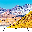

In [ ]:
# load image
reshape_X = 3072
path = "/content/images/television.jpg"
television = tf.keras.utils.load_img(
    path,
    grayscale=False,
    color_mode='rgb',
    target_size=(32,32),
    interpolation='nearest'
)
television

In [ ]:
# predict image value
television = np.array(television)
television = television / 255
television= television.reshape(1, reshape_X)
television = television.astype('float32')
television = pca.transform(television)
television_pred = xgb.predict(television)
television_pred

ValueError: ignored

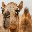

In [ ]:
# load image
reshape_X = 3072
path = "/content/images/camel.jpg"
camel = tf.keras.utils.load_img(
    path,
    grayscale=False,
    color_mode='rgb',
    target_size=(32,32),
    interpolation='nearest'
    )
camel

In [ ]:
# predict image value
camel = np.array(camel)
camel = camel / 255
camel = camel.reshape(1, reshape_X)
camel = camel.astype('float32')
camel = pca.transform(camel)
camel_pred = xgb.predict(camel)
camel_pred

ValueError: ignored

## Problem 2

## Perform Text Classification on the tweet data about COVID19. The tweets have been pulled from Twitter and manual tagging has been done then. The relevant CSV file have been attached in D2L.

## A sample .ipynb work file for this problem have been provided with spam.csv file (File used in Class). This file contains code for TF-IDF along with Gensim LDA package to find latent topics for the tweets (Topic Modelling). 

## Top of the code file contains relevent references for the code, please go through them. Few things are missing in the code that you need to apply to complete it.

### 1. Use the original Tweet File instead of my sample spam.csv file for your work. [2 Marks]
### 2. Properly remove punctuations, stopwords and any words of length 1 or 2. [3 Marks]
### 3. Get the wordcloud (as mentioned in the code) after apply step 1 (This has not been done in the code). [2 Marks]
### 4. Change number of Topics to 20 in the Gensim LDAMulticore and draw the visualisation asshown in samplecode. [3 Marks]
### 5. Write a complete code using TF-IDF along with Random Forest Classifier to build a Tweet Sentiment classification Model.Use your own discretion to determine the relevant hyperparameters and model parameters. Make sure to provide justification while dropping a column. Remember this is a multiclass classification problem. Give the relevant precision and recall for the model.[10 Marks]


## Columns:
## 1) Location
## 2) Tweet At
## 3) Original Tweet
## 4) Sentiment (To be predicted)

In [ ]:
# import dataset
corona = pd.read_csv("Corona_NLP_train.csv", encoding='latin-1')

In [ ]:
corona.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
#convert the Username to Categorical
corona['UserName'] = corona['UserName'].astype(str) 
corona['ScreenName'] = corona['ScreenName'].astype(str)

In [ ]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  object
 1   ScreenName     41157 non-null  object
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: object(6)
memory usage: 1.9+ MB


In [ ]:
# now all object

In [ ]:
corona.shape

(41157, 6)

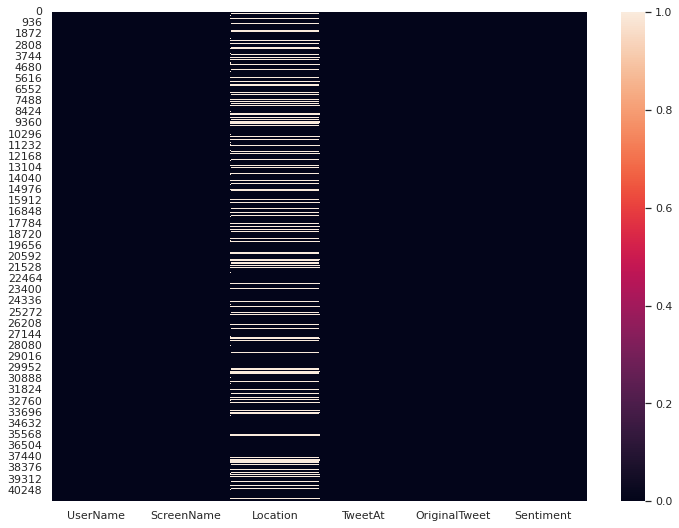

In [ ]:
# map missing data
sns.set(rc={'figure.figsize':(12,9)}) # set graph size
sns.heatmap(corona.isnull()) # white line means missing

In [ ]:
# drop miss values for the location column
corona = corona.drop('Location', axis=1)
corona.isna().sum() # check for missing

UserName         0
ScreenName       0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [ ]:
# remove punctuations and stop words
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# list comprehension to remove punctuations
corona['OriginalTweet'] = [w for w in corona['OriginalTweet'] if w not in punctuation]

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
print(sw)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# list comprehension to remove stop words
corona['OriginalTweet'] = [w for w in corona['OriginalTweet'] if w not in sw] 

In [ ]:
# check the lenght
print(len(corona['OriginalTweet']))
print(len(corona['OriginalTweet']))

41157
41157


In [ ]:
# prepare the date for word cloud and import needed libraries
import gensim
from gensim import corpora, models

from pprint import pprint

In [ ]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=3613cc0e2b02707c9fdabe121598f04eb87fc8e1381d821cecaf60ddf94e2bef
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
stopwords = nltk.corpus.stopwords.words('english') # list of stop words from english language
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
messages = corona.drop(labels = ["UserName", "ScreenName", "TweetAt"], axis = 1) # drop not needed columns
messages

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [ ]:
messages.columns = ["OriginalTweet", "Sentiment"]	# create final dataset for analysis

In [ ]:
# visualize text using word cloud with bigger text means words are repeated in high frequency
from wordcloud import WordCloud 
wc = WordCloud(
    background_color='black',
    max_words = 100,
    random_state = 42,
    max_font_size=110
    )

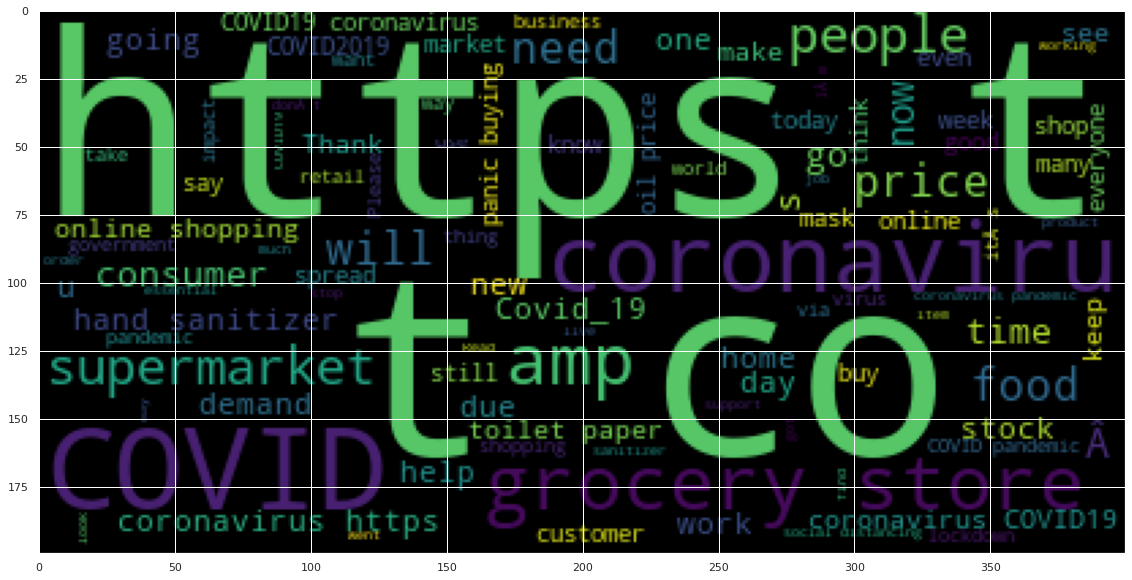

In [ ]:
# plot
wc.generate(' '.join(messages['OriginalTweet']))
plt.figure(figsize=(60,10))
plt.imshow(wc)
plt.show()

In [ ]:
# word cloud showed the bigger the font the higher the frequency of the words

In [ ]:
documents = messages['OriginalTweet'].tolist() # changing messages to list

# remove common words and tokenize
texts = [
    [word for word in document.lower().split() if word not in stopwords]
    for document in documents
]

In [ ]:
# define the dictionary of common words
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 2),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 2),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1)],
 [(27, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1)],
 [(42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 2),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 2),
  (61, 1),
  (62, 1)],
 [(42, 1),
  (45, 1),
  (46, 1),
  (53, 1),
  (58, 1),
  (61, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1)],
 [(33, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (

In [ ]:
# run using tfid model
tfidf = models.TfidfModel(corpus)

corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# run using gensim with 20 topics
lda_model = gensim.models.LdaMulticore(corpus_tfidf, 
                                       num_topics=20, 
                                       id2word = dictionary, 
                                       passes = 2, 
                                       workers=2)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
# words in occuring top with relative weight (20 topics)
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.003*"#sanitizer" + 0.002*"#staysafe" + 0.002*"#coronavirus" + 0.002*"#mask" + 0.001*"#covid19" + 0.001*"#stayhome" + 0.001*"consumer" + 0.001*"dump" + 0.001*"covid-19" + 0.001*"?"


Topic: 1 
Words: 0.002*"covid-19" + 0.002*"#coronavirus" + 0.002*"prices" + 0.002*"â" + 0.001*"consumer" + 0.001*"gold" + 0.001*"#covid19" + 0.001*"online" + 0.001*"grocery" + 0.001*"hand"


Topic: 2 
Words: 0.003*"property" + 0.001*"#coronaviruslockdown" + 0.001*"#coronavirus" + 0.001*"fastest" + 0.001*"#facemasks" + 0.001*"delay" + 0.001*"." + 0.001*"tenants" + 0.001*"consumer" + 0.001*"creative"


Topic: 3 
Words: 0.002*"workers" + 0.002*"grocery" + 0.002*"covid-19" + 0.002*"store" + 0.002*"food" + 0.001*"#coronavirus" + 0.001*"online" + 0.001*"consumer" + 0.001*"19" + 0.001*"dying"


Topic: 4 
Words: 0.002*"#coronavirus" + 0.002*"covid-19" + 0.002*"prices" + 0.002*"store" + 0.002*"#covid19" + 0.002*"ppe" + 0.002*"grocery" + 0.001*"hand" + 0.001*"sanitizer" + 0.001*"people"


Topic: 5

In [ ]:
# Compute Perplexity of the model
print('\nPerplexity: ', lda_model.log_perplexity(corpus_tfidf))  

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -13.91537511517539


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
# visualize
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus_tfidf, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
5     -0.109425 -0.053917       1        1  9.063274
16    -0.088795 -0.016925       2        1  7.828017
7     -0.081402  0.097008       3        1  6.820889
14    -0.046769 -0.034931       4        1  6.137532
6     -0.040687 -0.059356       5        1  6.043438
17    -0.051692  0.000976       6        1  5.978470
12    -0.032562  0.106986       7        1  5.736120
19    -0.034485  0.007208       8        1  5.432971
4     -0.019985 -0.028472       9        1  5.352344
1      0.000353 -0.024596      10        1  5.009102
18     0.008254  0.027348      11        1  4.317000
3      0.012188  0.006326      12        1  4.310491
9      0.032764 -0.020643      13        1  4.139861
8      0.033403 -0.016811      14        1  4.047457
10     0.045899  0.006536      15        1  3.829787
0      0.062659 -0.009832      16        1  3.568908
15     0.067334  0.004043      17        1  3.328779
11     0.067563  0.007300      18        1  3.233680
2      0.084876  0.000971      19        1  2.969245
13     0.090509  0.000781      20        1  2.852635, topic_info=               Term        Freq       Total Category  logprob  loglift
9076     #sanitizer   35.000000   35.000000  Default  30.0000  30.0000
4984      sentiment   26.000000   26.000000  Default  29.0000  29.0000
37994        output   27.000000   27.000000  Default  28.0000  28.0000
11730       webinar   21.000000   21.000000  Default  27.0000  27.0000
2221            oil  140.000000  140.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
45     #coronavirus    4.728546  275.565195  Topic20  -6.8862  -0.5083
33         covid-19    4.487849  275.019724  Topic20  -6.9384  -0.5585
46         #covid19    3.816772  215.381631  Topic20  -7.1004  -0.4761
236        consumer    3.405463  244.164434  Topic20  -7.2144  -0.7155
16714       futures    3.083938    8.904104  Topic20  -7.3136   2.4966

[1427 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
18955      9  0.941438          "how
9120      17  0.854257         #2020
13678     10  0.781666        #?????
8840       6  0.897577  #advertising
837        3  0.973020        #alert
...      ...       ...           ...
1563      10  0.191738            â
1563      13  0.031956            â
1563      15  0.031956            â
1563      16  0.031956            â
1563      17  0.127825            â

[3466 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 17, 8, 15, 7, 18, 13, 20, 5, 2, 19, 4, 10, 9, 11, 1, 16, 12, 3, 14])

In [ ]:
# import libraries
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [ ]:
messages['OriginalTweet']

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

In [ ]:
# convert sentiment variabl into binary by  replacing rating of Negative,Extremely Negative,Neutral with 0 (not good) and Positive, Extremely Positive with 1 (good) 
def review_sentiment(Sentiment):
   
    if(Sentiment == "Negative" or Sentiment == "Extremely Negative" or Sentiment == "Neutral"):
        return 0
    else:
        return 1

messages['Sentiment'] = messages['Sentiment'].apply(review_sentiment)

In [ ]:
messages.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0
1,advice Talk to your neighbours family to excha...,1
2,Coronavirus Australia: Woolworths to give elde...,1
3,My food stock is not the only one which is emp...,1
4,"Me, ready to go at supermarket during the #COV...",0


In [ ]:
messages['Sentiment'].value_counts()

0    23111
1    18046
Name: Sentiment, dtype: int64

In [ ]:
# Define the dependent variable class
factor = pd.factorize(messages['Sentiment'])
messages.Sentiment = factor[0]
definitions = factor[1]
print(messages.Sentiment.head(5))
print(definitions)

0    0
1    1
2    1
3    1
4    0
Name: Sentiment, dtype: int64
Int64Index([0, 1], dtype='int64')


In [ ]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer

# cleaning pipeline
cv = CountVectorizer(ngram_range=(1,2))

In [ ]:
# transformed
messages['OriginalTweet'] = str(messages['OriginalTweet'])
cv_tranformed = cv.fit_transform(messages['OriginalTweet']).toarray()

In [ ]:
messages['OriginalTweet'] = cv_tranformed

In [ ]:
messages.info() # check types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   OriginalTweet  41157 non-null  int64
 1   Sentiment      41157 non-null  int64
dtypes: int64(2)
memory usage: 643.2 KB


In [ ]:
# check all variables are in numeric format
numerical = [var for var in messages.columns if messages[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 2 numerical variables

The numerical variables are : ['OriginalTweet', 'Sentiment']


In [ ]:
# define X and Y
x = messages.drop('Sentiment', axis=1)
y = messages['Sentiment']

In [ ]:
x.head()

,OriginalTweet
0,1
1,1
2,1
3,1
4,1


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Sentiment, dtype: int64

In [ ]:
# split data
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y, test_size = 0.3,random_state = 21)

In [ ]:
x_train1.shape , x_test1.shape # check shape

((28809, 1), (12348, 1))

In [ ]:
y_train1.shape, y_test1.shape # check shape

((28809,), (12348,))

In [ ]:
# define vectorizer
tfidf_vect = TfidfVectorizer(analyzer=corpus_tfidf)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(n_estimators=15, max_depth=2, random_state=0, criterion="entropy")
rfc_model1 = rfc1_new.fit(x_train1, y_train1)

In [ ]:
# predict
ypred_test = rfc_model1.predict(x_test1)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test1, ypred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6893    0]
 [5455    0]]

True Positives(TP) =  6893

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  5455


In [ ]:
# accuracy
ypred_test=rfc1_new.predict(x_test1)

print("Accuracy rate:",metrics.accuracy_score(y_test1, ypred_test))

Accuracy rate: 0.5582280531260123


In [ ]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix

print(metrics.classification_report(ypred_test,y_test1))
print(metrics.confusion_matrix(ypred_test,y_test1))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72     12348
           1       0.00      0.00      0.00         0

    accuracy                           0.56     12348
   macro avg       0.50      0.28      0.36     12348
weighted avg       1.00      0.56      0.72     12348

[[6893 5455]
 [   0    0]]
